In [3]:
# Importing the necessary Libraries
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-03,70.000000,68.629997,69.066002,69.417999,67675000.0,69.417999
2017-08-04,71.454002,68.660004,69.400002,71.382004,46344500.0,71.382004
2017-08-07,71.896004,70.550003,71.470001,71.033997,31622500.0,71.033997
2017-08-08,73.716003,71.480003,71.505997,73.043999,37249000.0,73.043999
2017-08-09,74.000000,71.790001,72.199997,72.706001,34460500.0,72.706001
...,...,...,...,...,...,...
2022-07-27,827.780029,785.369995,791.429993,824.460022,29370000.0,824.460022
2022-07-28,849.900024,818.400024,840.200012,842.700012,28241000.0,842.700012
2022-07-29,894.960022,837.299988,842.099976,891.450012,31771000.0,891.450012


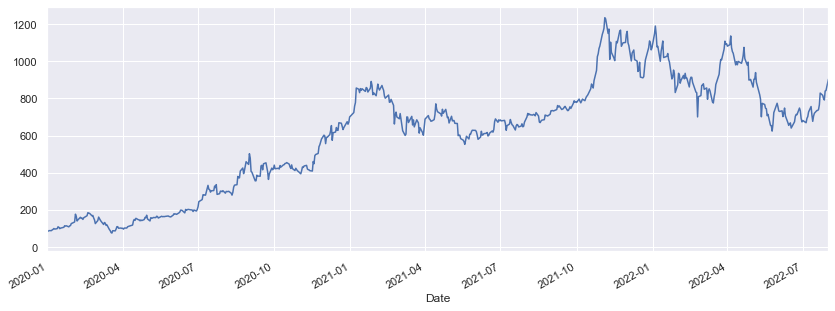

In [12]:
df_tesla['Open'].plot(xlim=['2020', '2022-08'], figsize=(14,5))
sns.set_theme(style='white')
sns.set_style("darkgrid")

**Simple Moving Average (SMA):**

In [13]:
df_tesla['Open:10 Days Rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()

In [21]:
df_tesla['Open:20 Days Rolling'] = df_tesla['Open'].rolling(window=20, min_periods=1).mean()
df_tesla['Open:30 Days Rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla['Open:50 Days Rolling'] = df_tesla['Open'].rolling(window=50, min_periods=1).mean()

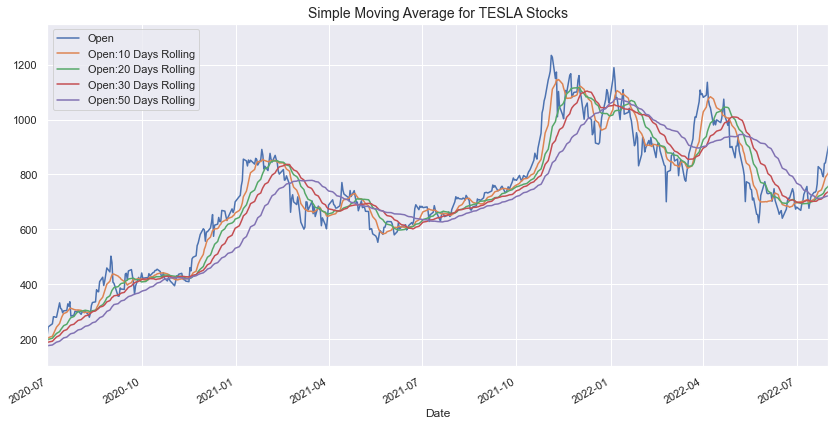

In [27]:
df_tesla[['Open', 'Open:10 Days Rolling', 'Open:20 Days Rolling', 'Open:30 Days Rolling', 
          'Open:50 Days Rolling']].plot(xlim=['2020-07', '2022-08'], ylim = [100, 1350], figsize=(14,7))
plt.title('Simple Moving Average for TESLA Stocks', 
         fontdict= {'fontsize': 14})
sns.set_theme(style='white')
sns.set_style("darkgrid")

**Disadvantage of SMA:**

    - Every data point is assigned the same-weightage.

**Cumulative Moving Average (CMA):**

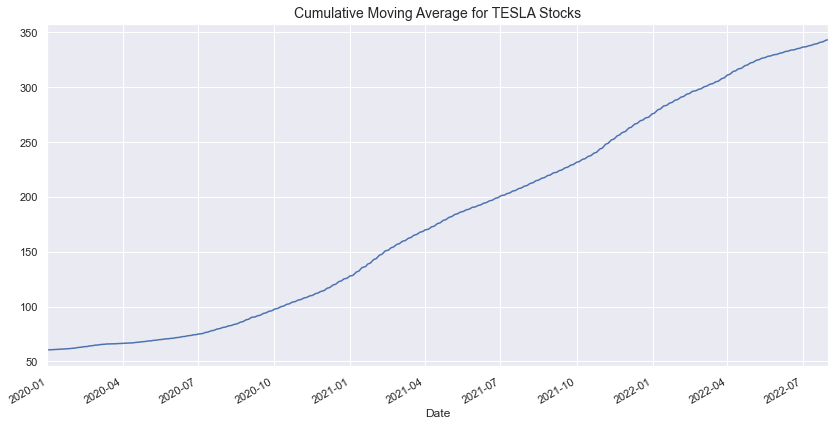

In [32]:
# CMA can be calculated using Expanding function:
df_tesla['Open'].expanding().mean().plot(xlim=['2020', '2022-08'], figsize=(14,7))
plt.title('Cumulative Moving Average for TESLA Stocks', 
         fontdict= {'fontsize': 14})
sns.set_theme(style='white')
sns.set_style("darkgrid")

**EWMA: Exponential weighted Moving Average**

In [39]:
# EMA (Exponential Moving Average) Tesla Shares:
# smoothening factor = 0.1
df_tesla['Open-EMA-0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

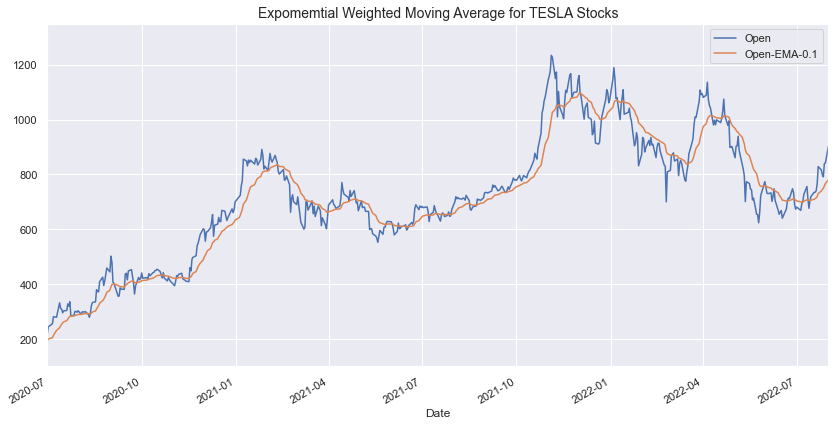

In [40]:
df_tesla[['Open', 'Open-EMA-0.1']].plot(xlim=['2020-07', '2022-08'], ylim = [100, 1350], figsize=(14,7))
plt.title('Expomemtial Weighted Moving Average for TESLA Stocks', 
         fontdict= {'fontsize': 14})
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [42]:
# smoothening factor = 0.3
df_tesla['Open-EMA-0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

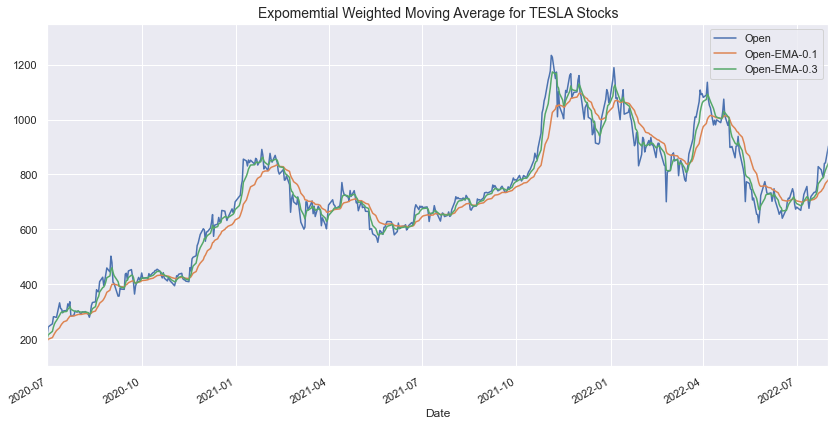

In [43]:
df_tesla[['Open', 'Open-EMA-0.1', 'Open-EMA-0.3']].plot(xlim=['2020-07', '2022-08'], ylim = [100, 1350], figsize=(14,7))
plt.title('Expomemtial Weighted Moving Average for TESLA Stocks', 
         fontdict= {'fontsize': 14})
sns.set_theme(style='white')
sns.set_style("darkgrid")

**ARMA (Auto Regression Moving Average)** is great for Forecasting (Sales, Monthly Production, ...)

    - When we you use Auto-correlation Function (ACF) ?
    - and when do we use Partial Auto-correlation Function (PACF) 